# Analisa Data Penumpang Penerbangan

Temukan data yang menurut kalian menarik pada http://data.go.id . Buat analisa data yang berisi:
1. Deskripsi data
2. Statistik tentang data
3. Visualisasi sederhana
4. Narasi analisis

------
## Descriptive Analysis Airlines Pessenger
*Mukti Setyaji* <br>
*23-Oct-2018*

* **1. Introduction**
    * 1.1 Dataset
    * 1.2 Objective
* **2. Data Exploration**
* **3. Basic Statistic**
* **4. Data Visualization***
* **5. Conclusion**
* **6. Future Work**

### 1. Introduction
#### 1.1 Dataset

[The Dataset](https://data.go.id/dataset/jumlah-penumpang-yang-berangkat-pada-penerbangan-domestik) we used are about the total of airlines pessenger in Indonesia (nationaly). It has four feature:
1. tahun: a variable that will tell us in what year the data is taken.
2. bulan: a variable that will tell us in what month the data is taken.
3. jumlah_penumpang: a variable that will tell us the sum of pessenger.
4. bandara: a variable that will tell us in which airport the data is taken.

from this feature, we can say that our main focus are on 'jumlah_penunpang'.

#### 1.2 Objective

1. What was the total pessenger over the past 13 year?
2. What was the total pessenger over the past 13 year in month?
3. What airport that have most pessenger?

### 2. Data Exploration

First, we need to import every library that we're going to use, setting up style preferences, and checking out the data in directory.

In [300]:
# import every package that we're going to use
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# style
sns.set(style="darkgrid")
color = sns.color_palette()

# check what inside folder
os.listdir("./data/airline")

['jumlah-penumpang-penerbangan-internasional.csv',
 'info',
 'produksi-perusahaan-penerbangan-luar-negeri.csv',
 'jumlah-penumpang-penerbangan-domestik.csv',
 'produksi-perusahaan-penerbangan-dalam-negeri.csv']

Import the data into dataframe, so it'll easier for us to explore the data

In [301]:
# Store path
dataset = "./data/airline/jumlah-penumpang-penerbangan-domestik.csv"

# Create Dataframe
df = pd.read_csv(dataset, delimiter=';')

We're going to see the feature that we have.

In [302]:
# Check columns
print (df.columns)

Index(['nama_variabel', 'nama_variabel_turunan', 'nama_tahun',
       'nama_turunan_tahun', 'data_content', 'nama_item_vertical_variabel'],
      dtype='object')


There is something wrong here. Before jumping to a conclusion we're going to check the data.

In [303]:
print (df.sample(5))

                                 nama_variabel  \
328  Jumlah Penumpang Pesawat di Bandara Utama   
130  Jumlah Penumpang Pesawat di Bandara Utama   
190  Jumlah Penumpang Pesawat di Bandara Utama   
185  Jumlah Penumpang Pesawat di Bandara Utama   
564  Jumlah Penumpang Pesawat di Bandara Utama   

                       nama_variabel_turunan  nama_tahun nama_turunan_tahun  \
328  Keberangkatan pada Penerbangan Domestik        2011               Juni   
130  Keberangkatan pada Penerbangan Domestik        2008              Maret   
190  Keberangkatan pada Penerbangan Domestik        2009              Maret   
185  Keberangkatan pada Penerbangan Domestik        2009           Februari   
564  Keberangkatan pada Penerbangan Domestik        2015                Mei   

     data_content nama_item_vertical_variabel  
328        279921                  Ngurah Rai  
130        176427                     Polonia  
190        170956                     Polonia  
185        149527               

Okay, there is a column that we don't need here: "nama_variabel" and "nama_variabel_turunan" and the column name is not in the right name

So, we're going to delete the entire column "nama_variabel" and "nama_variabel_turunan"

In [304]:
df = df.drop(columns="nama_variabel")
df = df.drop(columns="nama_variabel_turunan")
print (df.sample(5))

     nama_tahun nama_turunan_tahun  data_content nama_item_vertical_variabel
525        2014            Oktober        262136                     Polonia
183        2009            Januari        176843                  Ngurah Rai
291        2010           November       1312017              Soekarno Hatta
311        2011              Maret       1402161              Soekarno Hatta
549        2015           Februari        215298                   Hasanudin


Then change the columns name

In [305]:
df.columns = ["tahun", "bulan", "jumlah_penumpang", "bandara"]

print (df.sample(5))

     tahun     bulan  jumlah_penumpang     bandara
174   2008  November            138028   Hasanudin
648   2016   Oktober            430997  Ngurah Rai
84    2007       Mei            124718   Hasanudin
217   2009   Agustus            381083      Juanda
138   2008     April            153204  Ngurah Rai


Now, let's see the dataframe information.

In [306]:
print (df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 760 entries, 0 to 759
Data columns (total 4 columns):
tahun               760 non-null int64
bulan               760 non-null object
jumlah_penumpang    760 non-null int64
bandara             760 non-null object
dtypes: int64(2), object(2)
memory usage: 23.8+ KB
None


We need to change data type in column "bulan" from object(str) to object(int). We need to change this so the result we get in appropriate manner. <br>
(From: Jan-Des in format (1-12), if we don't do this the sort would be From: Aug-November in asc)

In [307]:
M = {"Januari": 1, 
     "Februari": 2,
     "Maret": 3,
     "April": 4,
     "Mei": 5,
     "Juni": 6,
     "Juli": 7,
     "Agustus": 8,
     "September": 9,
     "Oktober": 10,
     "November": 11,
     "Desember": 12}

df.bulan = df.bulan.map(M)
df.tahun = df.astype('object')

Let's check if there is a missing value.

In [308]:
# Check missing value
print (df.isnull().sum().sort_values())

tahun               0
bulan               0
jumlah_penumpang    0
bandara             0
dtype: int64


We need to check if there is some traits in data. (jumlah_penumpang = 0)

In [309]:
print (df["jumlah_penumpang"].describe())

count    7.600000e+02
mean     5.384331e+05
std      4.968466e+05
min      9.344100e+04
25%      2.295805e+05
50%      3.178415e+05
75%      6.107960e+05
max      2.132360e+06
Name: jumlah_penumpang, dtype: float64


It seems we have a clear data, let see the data then.

In [310]:
print (df.head(10))

  tahun  bulan  jumlah_penumpang         bandara
0  2006      1            169652         Polonia
1  2006      1           1005200  Soekarno Hatta
2  2006      1            329764          Juanda
3  2006      1            136457      Ngurah Rai
4  2006      1            109646       Hasanudin
5  2006      2            138623         Polonia
6  2006      2            723717  Soekarno Hatta
7  2006      2            257149          Juanda
8  2006      2            107825      Ngurah Rai
9  2006      2             93528       Hasanudin


In [311]:
print (df.tail(10))

    tahun  bulan  jumlah_penumpang         bandara
750  2018      7            361523         Polonia
751  2018      7           2132360  Soekarno Hatta
752  2018      7            856010          Juanda
753  2018      7            546118      Ngurah Rai
754  2018      7            431134       Hasanudin
755  2018      8            317360         Polonia
756  2018      8           1932013  Soekarno Hatta
757  2018      8            720669          Juanda
758  2018      8            509666      Ngurah Rai
759  2018      8            361565       Hasanudin


In [312]:
easy_df = df.groupby(["tahun", "bulan", "bandara"]).sum()
print (easy_df.head(10))

                            jumlah_penumpang
tahun bulan bandara                         
2006  1     Hasanudin                 109646
            Juanda                    329764
            Ngurah Rai                136457
            Polonia                   169652
            Soekarno Hatta           1005200
      2     Hasanudin                  93528
            Juanda                    257149
            Ngurah Rai                107825
            Polonia                   138623
            Soekarno Hatta            723717


### 3. Basic Statistic

In [313]:
pessenger_growth_in_year = df.groupby("tahun").sum()["jumlah_penumpang"]
print (pessenger_growth_in_year)

tahun
2006    19352551
2007    21092617
2008    21016141
2009    23755956
2010    28033773
2011    32297644
2012    36431328
2013    38812708
2014    38051273
2015    36644324
2016    41094610
2017    42780122
2018    29846092
Name: jumlah_penumpang, dtype: int64


In [314]:
#pessenger_growth_in_month = df.groupby(["tahun", "bulan"]).sum()
pessenger_growth_in_month = pd.pivot_table(df, values="jumlah_penumpang", index=["bulan"], columns=["tahun"], aggfunc=np.sum)

print (pessenger_growth_in_month)

tahun       2006       2007       2008       2009       2010       2011  \
bulan                                                                     
1      1750719.0  1616458.0  1885122.0  1805469.0  2156030.0  2552852.0   
2      1320842.0  1214719.0  1657430.0  1598861.0  1947299.0  2305103.0   
3      1494624.0  1496160.0  1840429.0  1874506.0  2138945.0  2508704.0   
4      1567581.0  1816134.0  1636647.0  1730277.0  2196266.0  2477465.0   
5      1544567.0  1723827.0  1717530.0  2014524.0  2327565.0  2573053.0   
6      1580139.0  1752591.0  1720834.0  2039443.0  2372943.0  2910025.0   
7      1839908.0  2033904.0  1902375.0  2220124.0  2648481.0  3051533.0   
8      1713851.0  1905218.0  1850865.0  2019504.0  2115276.0  2428291.0   
9      1579539.0  1619928.0  1375451.0  1840816.0  2439281.0  2909316.0   
10     1463691.0  1996695.0  1837525.0  2254197.0  2561100.0  2769437.0   
11     1713597.0  1913936.0  1716316.0  2133607.0  2407455.0  2861276.0   
12     1783493.0  2003047

In [324]:
month_pessenger_growth_overall = df.groupby("bulan").mean()["jumlah_penumpang"]
print (month_pessenger_growth_overall)

bulan
1     532158.230769
2     458407.692308
3     517344.923077
4     513818.769231
5     540592.261538
6     545709.184615
7     597573.538462
8     565823.630769
9     520117.350000
10    548930.516667
11    539937.716667
12    583786.150000
Name: jumlah_penumpang, dtype: float64


In [315]:
most_used_airport = df.groupby("bandara").mean()["jumlah_penumpang"]
print (most_used_airport)

bandara
Hasanudin         2.322158e+05
Juanda            4.935688e+05
Ngurah Rai        2.911090e+05
Polonia           2.363798e+05
Soekarno Hatta    1.438892e+06
Name: jumlah_penumpang, dtype: float64


### 4. Data Visualization

Text(0.5, 1.0, 'Pessenger Growth in Year (2006 - August 2018)')

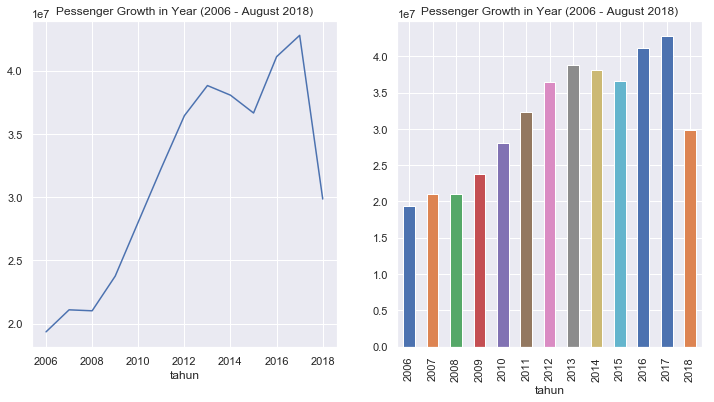

In [316]:
plt.figure(figsize=(12, 6))

ax = plt.subplot(1, 2, 1)
pessenger_growth_in_year.plot(kind="line", ax = ax)
plt.title("Pessenger Growth in Year (2006 - August 2018)")

ax = plt.subplot(1, 2, 2)
pessenger_growth_in_year.plot(kind="bar", ax = ax)
plt.title("Pessenger Growth in Year (2006 - August 2018)")

Text(0.5, 1.0, 'Total Pessenger in Airport')

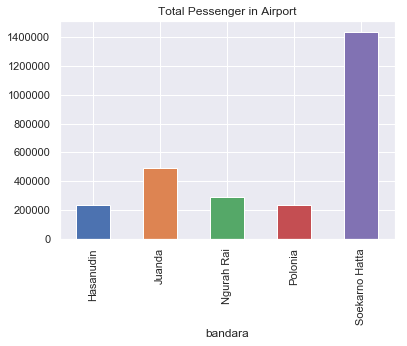

In [317]:
most_used_airport.plot(kind="bar")
plt.title("Total Pessenger in Airport")

Text(0.5, 1.0, 'Month Growth Within a Year (2006 - Aug 2018)')

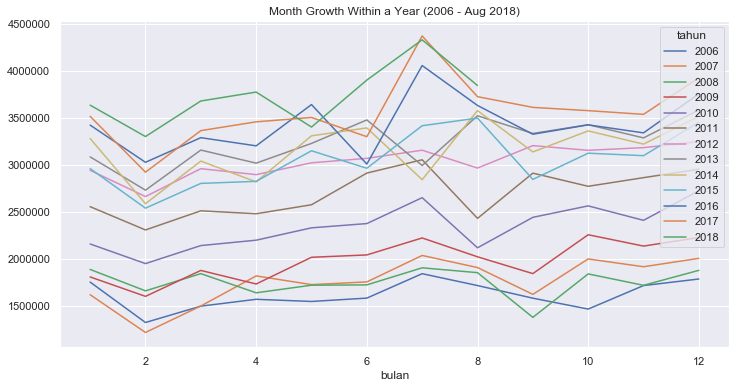

In [320]:
plt.figure(figsize=(12, 6))
ay = plt.subplot(1, 1, 1)

pessenger_growth_in_month.plot(ax = ay)
plt.title("Month Growth Within a Year (2006 - Aug 2018)")

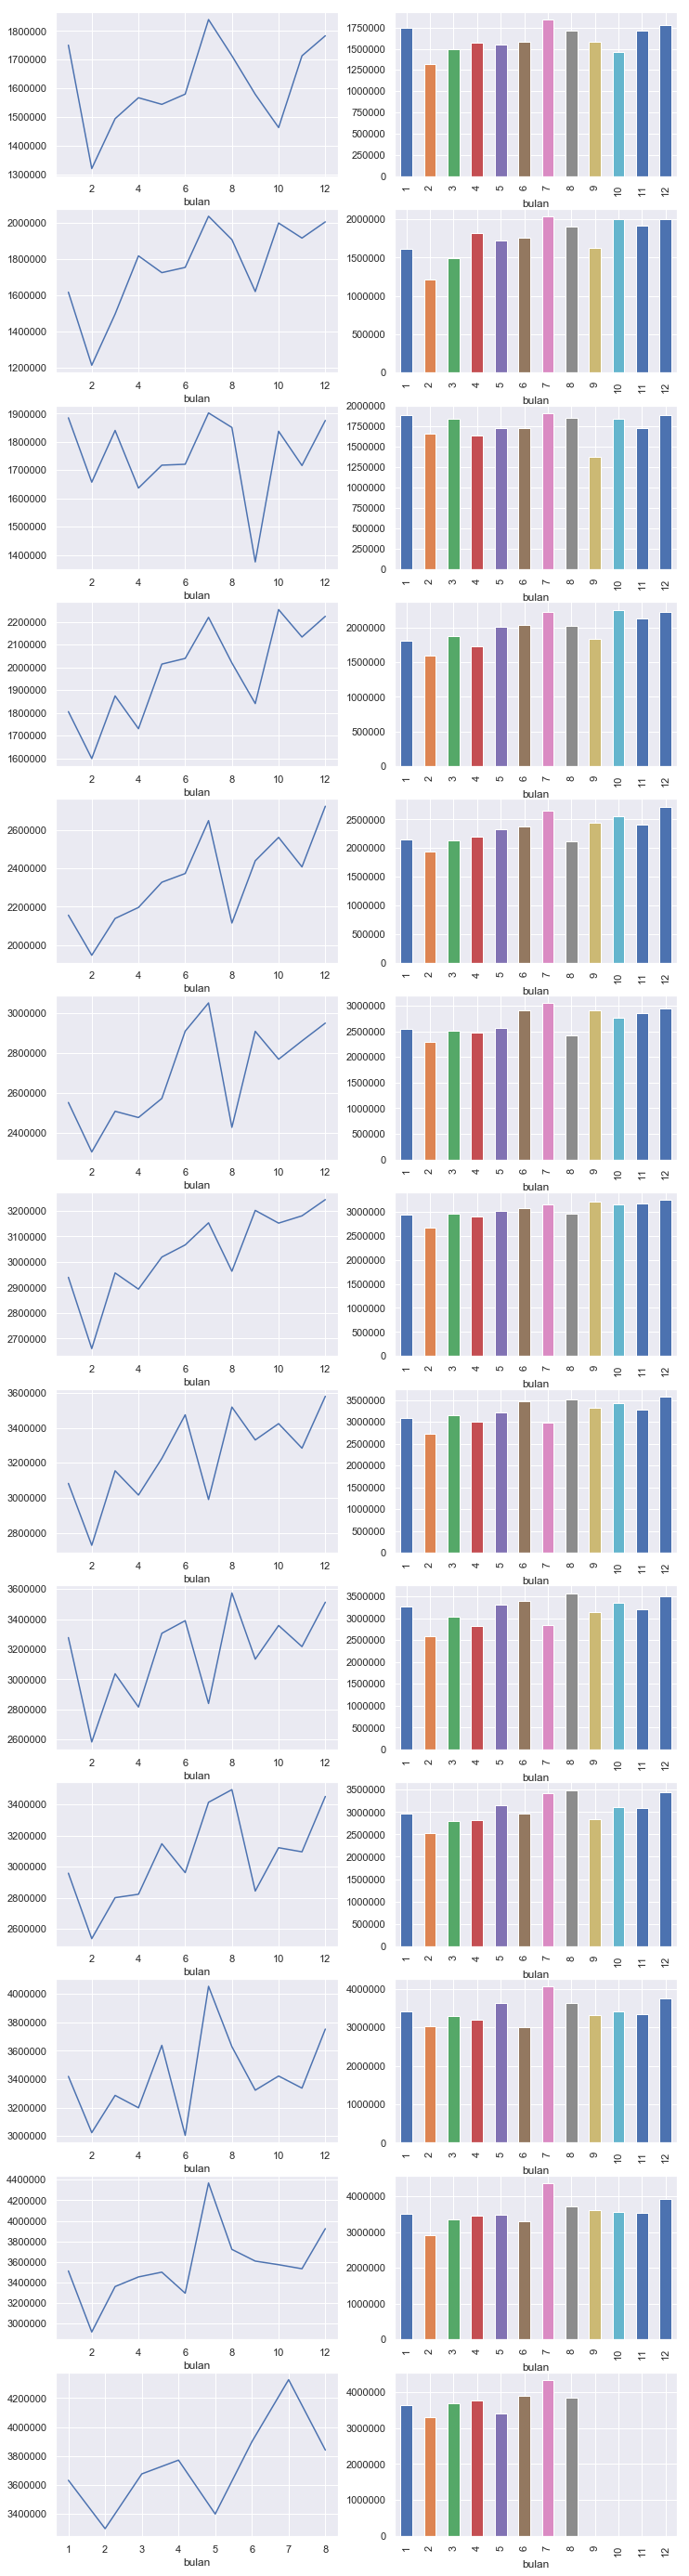

In [323]:
plt.figure(figsize=(12, 50))

base = 2006
num = 0

for i in range(0, 13):
    num += 1
        
    az = plt.subplot(13, 2, num)
    pessenger_growth_in_month[base + i].plot(ax=az)
    
    num += 1
    az = plt.subplot(13, 2, num)
    pessenger_growth_in_month[base + i].plot(kind="bar", ax=az)

Text(0.5, 1.0, 'Month Growth')

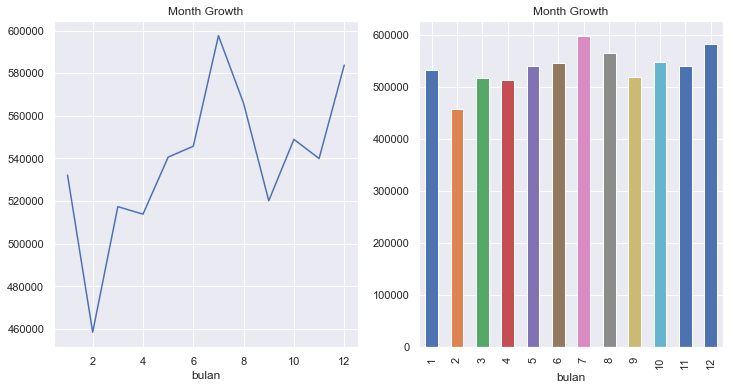

In [326]:
plt.figure(figsize=(12,6))

azz = plt.subplot(1, 2, 1)
month_pessenger_growth_overall.plot(ax = azz)
plt.title("Month Growth")

azz = plt.subplot(1, 2, 2)
month_pessenger_growth_overall.plot(kind="bar", ax = azz)
plt.title("Month Growth")

### 5. Descriptive Analysis

1. In last year (2017) Indonesia Domestic Flight has the most total pessenger than any other year. and in this year it has some possibilities that the total pessenger are growing, but it's not significant.
2. Every year we get the most pessenger at the middle of year (around month 5-8)
3. we get the most pessenger at Soekarno-Hatta

### 6. Future Work

* Add more dataset to gain more insight
* Add predictive analytics (Multi-varite linear regressien)